<a href="https://colab.research.google.com/github/syamkakarla98/DataScience_Head_Start/blob/master/UFO_Sightings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UFO Sightings**

![alt text](https://images.foxtv.com/static.fox35orlando.com/www.fox35orlando.com/content/uploads/2019/10/932/524/ufo-aliens.jpg?ve=1&tl=1)

### **Context**

This dataset contains over 80,000 reports of UFO sightings over the last century.

### **Content**

There are two versions of this dataset: scrubbed and complete. The complete data includes entries where the location of the sighting was not found or blank (0.8146%) or have an erroneous or blank time (8.0237%). Since the reports date back to the 20th century, some older data might be obscured. Data contains city, state, time, description, and duration of each sighting.

### **Inspiration**

What areas of the country are most likely to have UFO sightings?
Are there any trends in UFO sightings over time? Do they tend to be clustered or seasonal?
Do clusters of UFO sightings correlate with landmarks, such as airports or government research centers?
What are the most common UFO descriptions?

### **Acknowledgement**
This dataset was scraped, geolocated, and time standardized from NUFORC data by Sigmond Axel [here](https://github.com/planetsig/ufo-reports).


Let's get started...

## Import Modules

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = [12, 6]
plt.style.use('seaborn-whitegrid')

## Read Data


In [0]:
df = pd.read_csv('https://bit.ly/uforeports')

## Let's Start


In [70]:
# Viewving initial five samples of the dataset
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [71]:
# Shape of the data
df.shape

(18241, 5)

In [72]:
# Little information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null object
dtypes: object(5)
memory usage: 712.7+ KB


In [74]:
# Describing the data 
df.describe()

,City,Colors Reported,Shape Reported,State,Time
count,18216,2882,15597,18241,18241
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,780,2803,2529,27


In [57]:
# let's see the count of null values in every attribute
na = df.isna().sum()
print(na)

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64


A count plot to see the count of NaN values in the data.

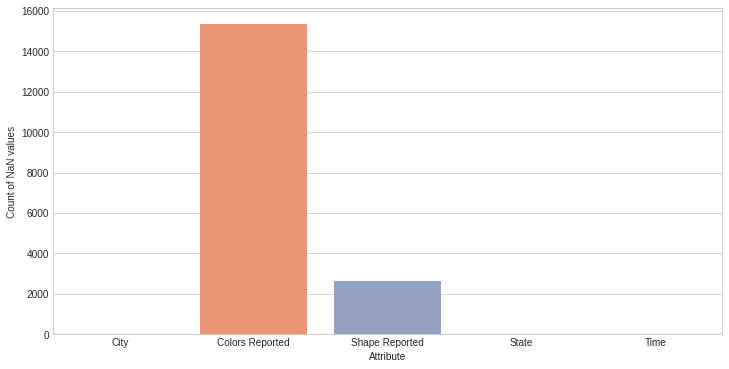

In [169]:
# na.plot(kind = 'bar');
# or
plt.figure(figsize=(12, 6))
sns.barplot(x = na.index, y = na, palette='Set2')
plt.ylabel('Count of NaN values')
plt.xlabel('Attribute')
plt.show()


Let's analyse the attributes of the data:

**1. City**

In [90]:
df.City.describe()

count       18216
unique       6476
top       Seattle
freq          187
Name: City, dtype: object

Top 10 cities UFO sightings noted

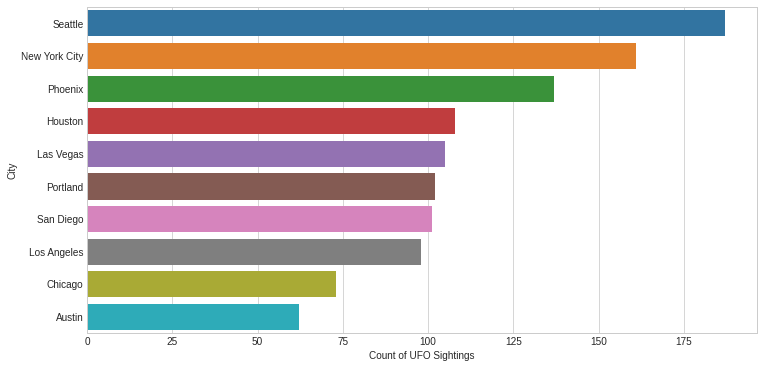

In [170]:
c = df.City.value_counts()[:10]
sns.barplot(y = c.index, x = c)
plt.xlabel('Count of UFO Sightings')
plt.ylabel('City');

The seattle has majorly notices UFO's.

**2. Colors Reported**

In [99]:
# Top 10 colors noticed and it's percentage
df.loc[:, 'Colors Reported'].value_counts(normalize=True)[:10]

RED               0.270645
GREEN             0.184247
ORANGE            0.183206
BLUE              0.156142
YELLOW            0.058640
RED GREEN         0.030881
RED BLUE          0.027065
RED ORANGE        0.015267
GREEN BLUE        0.011797
RED GREEN BLUE    0.011450
Name: Colors Reported, dtype: float64

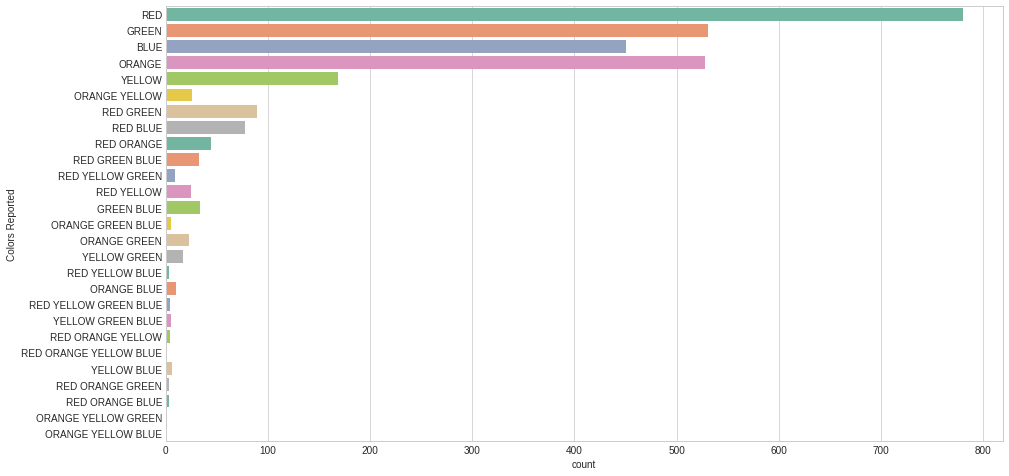

In [171]:
plt.figure(figsize=(15, 8))
sns.countplot(y = 'Colors Reported', data=df, palette='Set2');

**3. Shape Reported**

In [102]:
# Top 10 shapes of UFO's reported
s = df.loc[:, 'Shape Reported'].value_counts()[:10]
s

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
Name: Shape Reported, dtype: int64

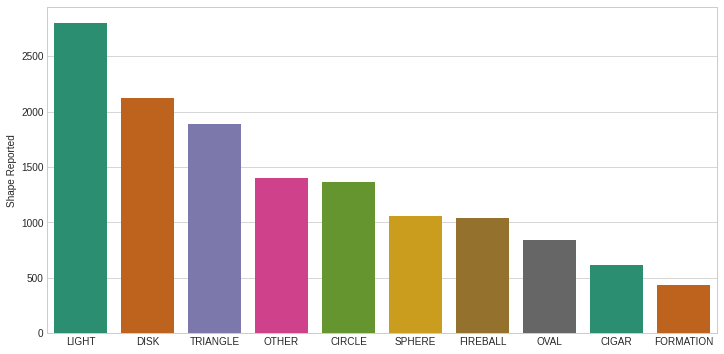

In [172]:
sns.barplot(x = s.index, y = s, palette = 'Dark2');

Ligh, Disk and Triangle are the mostly reported shapes of the UFO's.

**4. State**


In [150]:
st = df.State.value_counts()
st

CA    2529
WA    1322
TX    1027
NY     914
FL     837
AZ     738
OH     667
IL     613
PA     598
MI     591
OR     534
MO     448
NJ     370
CO     367
WI     357
NC     356
IN     326
GA     325
MA     322
VA     299
TN     286
NV     284
MN     254
KY     244
NM     241
CT     225
MD     215
AR     206
UT     193
OK     193
AL     193
ME     181
KS     176
LA     174
SC     166
IA     162
MT     144
MS     139
WV     132
ID     130
NH     125
AK     116
NE     101
HI      85
WY      69
RI      67
SD      57
ND      51
VT      44
DE      43
Fl       4
Ca       1
Name: State, dtype: int64

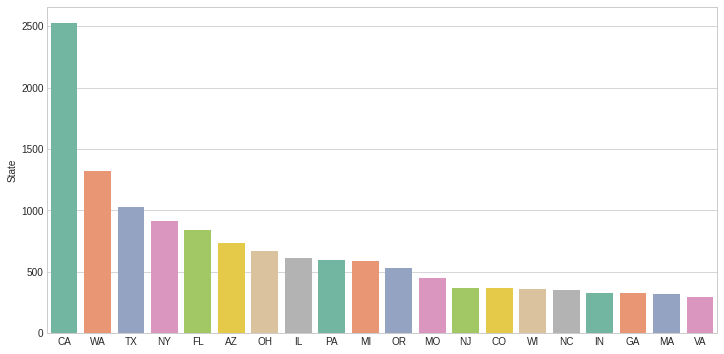

In [173]:
sns.barplot(x = st[:20].index, y = st[:20], palette='Set2');

**California**, **Washinton**, **Texas**, **NewYork** and **Florida** are the top five U.S states have the most UFO sightings.

**5.Time**

In [0]:
# Converting the string datatype to datetime
df['Time'] = pd.to_datetime(df.loc[:, 'Time'])

In [0]:
# Adding new attribute 'Year'
df['Year'] = df.Time.dt.year.astype('int')

In [207]:
df.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
Year                        int64
dtype: object

In [162]:
d = df.Time.dt.year.value_counts()
d

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
        ... 
1941       2
1936       2
1935       1
1934       1
1933       1
Name: Time, Length: 68, dtype: int64

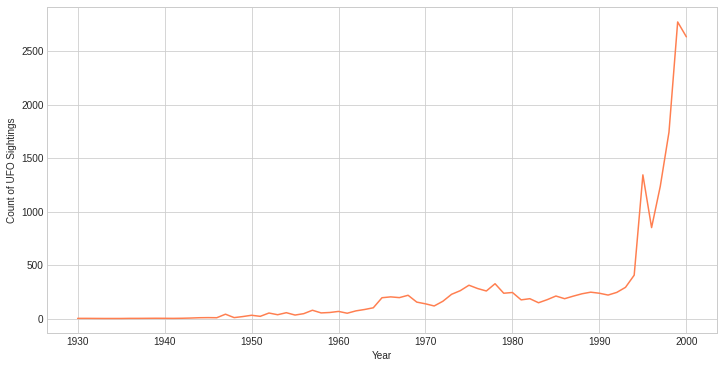

In [179]:
sns.lineplot(x = d.index, y = d, color="coral")
plt.xlabel('Year')
plt.ylabel('Count of UFO Sightings');

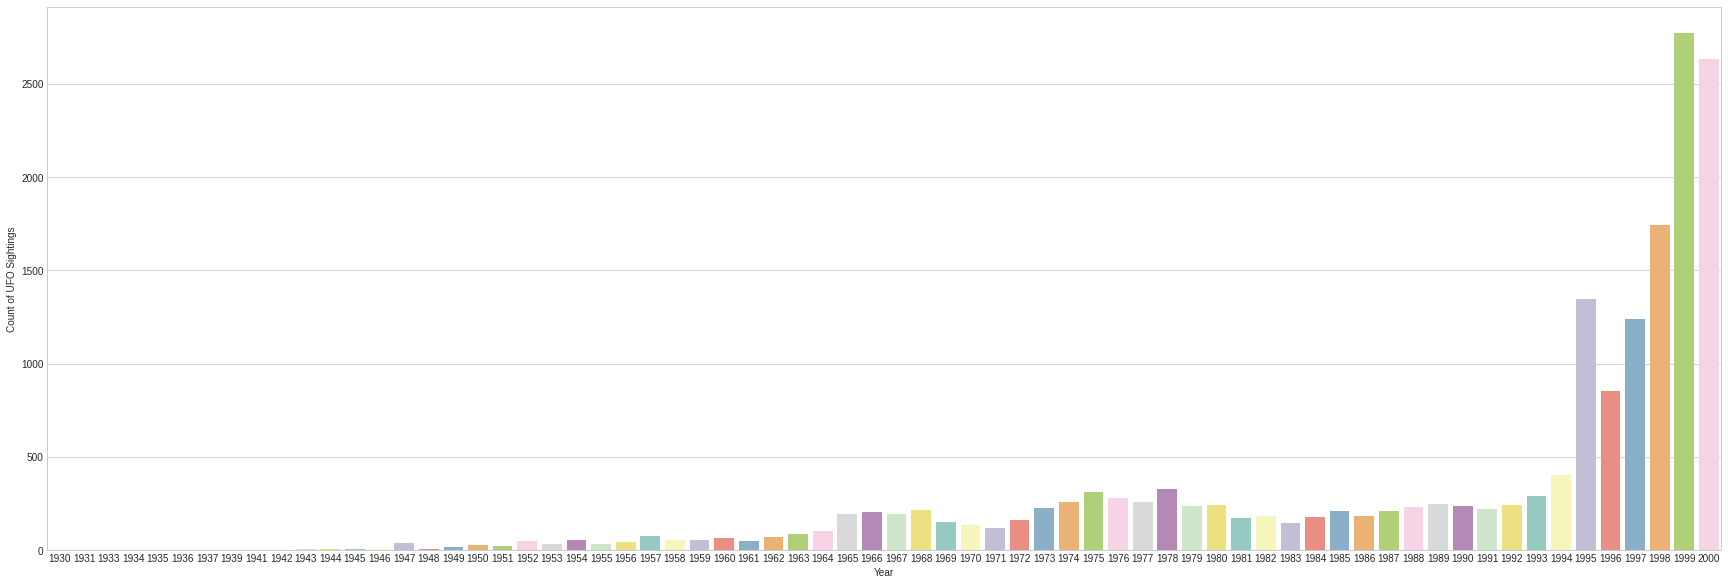

In [278]:
plt.figure(figsize=(30,  10))
sns.barplot(x = d.index, y = d, palette='Set3')
plt.xlabel('Year')
plt.ylabel('Count of UFO Sightings');

In [274]:
# To see the plotly graph, use colab
import plotly.express as px
fig = px.scatter(x =d.index, y = d, size = d, color = d.index, hover_name = d.index, log_x=True,size_max=100, render_mode="webgl")
fig.show()

The most UFO sightings are occured in **1999**